In [1]:
# pip install geopandas
import pandas as pd
import geopandas as gpd
import re
from shapely.geometry import Point

# Load the CSV file into a pandas DataFrame
file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'
df_2018 = pd.read_csv(file_path + '/boston_2018.csv', low_memory = False)
df_2019 = pd.read_csv(file_path + '/boston_2019.csv', low_memory = False)
df_2020 = pd.read_csv(file_path + '/boston_2020.csv', low_memory = False)
df_2021 = pd.read_csv(file_path + '/boston_2021.csv', low_memory = False)
df_2022 = pd.read_csv(file_path + '/boston_2022.csv', low_memory = False)
df_2023 = pd.read_csv(file_path + '/boston_2023.csv', low_memory = False)

Crime Data: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/313e56df-6d77-49d2-9c49-ee411f10cf58
<br>ACS Data: https://data.census.gov/table/ACSDP5Y2022.DP05?q=population&g=050XX00US36005$8600000,36047$8600000,36061$8600000,36081$8600000,36085$8600000

In [2]:
combined_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472976 entries, 0 to 472975
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      472976 non-null  object 
 1   OFFENSE_CODE         472976 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  472976 non-null  object 
 4   DISTRICT             469628 non-null  object 
 5   REPORTING_AREA       472976 non-null  object 
 6   SHOOTING             374490 non-null  object 
 7   OCCURRED_ON_DATE     472976 non-null  object 
 8   YEAR                 472976 non-null  int64  
 9   MONTH                472976 non-null  int64  
 10  DAY_OF_WEEK          472976 non-null  object 
 11  HOUR                 472976 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               470679 non-null  object 
 14  Lat                  448945 non-null  float64
 15  Long             

In [4]:
combined_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)"


In [5]:
combined_df.columns = combined_df.columns.str.lower()

In [6]:
combined_df['year'].unique()

array([2018, 2019, 2020, 2021, 2022, 2023])

In [7]:
combined_df['occurred_on_date'].isnull().mean()

0.0

In [8]:
combined_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)"


In [9]:
combined_df['occurred_on_date'] = combined_df['occurred_on_date'].str.slice(0, 10)

In [10]:
combined_df['lat'].isnull().mean()

0.0508080748283211

In [11]:
combined_df['long'].isnull().mean()

0.0508080748283211

In [12]:
combined_df[combined_df['long'].isnull()].shape

(24031, 17)

In [13]:
combined_df = combined_df.dropna(subset=['long'])

In [14]:
file_path_geo = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData/ZIP_Codes.geojson'

zipcode = gpd.read_file(file_path_geo)
zipcode.head()

,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength,geometry
0,1,02134,3.721936e+07,40794.182396,"POLYGON ((-71.12340 42.36421, -71.12345 42.364..."
1,2,02125,6.476052e+07,62224.521440,"POLYGON ((-71.04541 42.32381, -71.04579 42.323..."
2,3,02110,6.637284e+06,18358.213496,"POLYGON ((-71.05109 42.36418, -71.05109 42.364..."
3,4,02118,3.116158e+07,32353.407618,"POLYGON ((-71.06315 42.34689, -71.06433 42.347..."
4,5,02126,6.078585e+07,45488.394711,"POLYGON ((-71.09670 42.29095, -71.09692 42.290..."


In [15]:
def create_point_from_string(coord_str):
    match = re.match(r'\(([^,]+), ([^)]+)\)', coord_str)
    if match:
        lat, lon = map(float, match.groups())
        return Point(lon, lat)
    return None

In [16]:
combined_df['geometry'] = combined_df['location'].apply(create_point_from_string)

In [17]:
combined_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,geometry
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08015661 42.33153805)
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423049 42.34977988)
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06594539 42.29109287)
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07283786 42.35352153)
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06356881 42.29632282)


In [18]:
gdf = gpd.GeoDataFrame(combined_df, geometry='geometry')

In [19]:
gdf.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,geometry
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01,2018,1,Monday,0,Part Two,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08016 42.33154)
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01,2018,1,Monday,0,Part Two,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423 42.34978)
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01,2018,1,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06595 42.29109)
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07284 42.35352)
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01,2018,1,Monday,0,Part One,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06357 42.29632)


In [20]:
gdf.set_crs(epsg=4326, inplace=True)
zipcode.set_crs(epsg=4326, inplace=True)
result = gpd.sjoin(gdf, zipcode, how="left", op='within')

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [21]:
result.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,...,street,lat,long,location,geometry,index_right,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength
0,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018-01-01,2018,1,...,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08016 42.33154),10.0,11.0,02119,4.451150e+07,37680.702099
1,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018-01-01,2018,1,...,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423 42.34978),0.0,1.0,02134,3.721936e+07,40794.182396
2,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018-01-01,2018,1,...,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06595 42.29109),16.0,17.0,02124,8.565805e+07,57673.007747
3,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01,2018,1,...,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07284 42.35352),23.0,24.0,02116,1.911765e+07,23262.912273
4,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018-01-01,2018,1,...,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06357 42.29632),16.0,17.0,02124,8.565805e+07,57673.007747


In [22]:
result.set_index('occurred_on_date', inplace=True)

In [23]:
result.index = pd.to_datetime(result.index)

In [24]:
result.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,...,street,lat,long,location,geometry,index_right,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength
occurred_on_date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,I192074715,2629,Harassment,HARASSMENT,B2,278,NaN,2018,1,Monday,...,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)",POINT (-71.08016 42.33154),10.0,11.0,02119,4.451150e+07,37680.702099
2018-01-01,I192068538,1107,Fraud,FRAUD - IMPERSONATION,D14,794,NaN,2018,1,Monday,...,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)",POINT (-71.13423 42.34978),0.0,1.0,02134,3.721936e+07,40794.182396
2018-01-01,I192005657,2610,Other,TRESPASSING,C11,396,NaN,2018,1,Monday,...,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)",POINT (-71.06595 42.29109),16.0,17.0,02124,8.565805e+07,57673.007747
2018-01-01,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018,1,Monday,...,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",POINT (-71.07284 42.35352),23.0,24.0,02116,1.911765e+07,23262.912273
2018-01-01,I192013179,619,Larceny,LARCENY ALL OTHERS,C11,360,NaN,2018,1,Monday,...,CENTERVALE PARK,42.296323,-71.063569,"(42.29632282, -71.06356881)",POINT (-71.06357 42.29632),16.0,17.0,02124,8.565805e+07,57673.007747


In [25]:
weekly_data = result.groupby('ZIP5').resample('W').size().reset_index(name='total_count')

In [26]:
weekly_data['ZIP5'].unique().shape

(33,)

In [27]:
threshold_date = pd.to_datetime('2023-05-31')

In [28]:
weekly_data = weekly_data[weekly_data['occurred_on_date'] <= threshold_date]

NameError: name 'weekly_data' is not defined

In [29]:
mean_counts_by_zip = weekly_data.groupby('ZIP5')['total_count'].mean().reset_index()

In [30]:
mean_counts_by_zip

,ZIP5,total_count
0,02108,18.879433
1,02109,14.741135
2,02110,16.014184
3,02111,30.326241
4,02113,9.450355
5,02114,45.872340
6,02115,33.280142
7,02116,58.712766
8,02118,102.056738
9,02119,123.241135


In [31]:
weekly_data['total_count'].mean()

44.89677771709449

In [32]:
weekly_data.to_csv(file_path + '/boston_weekly_data.csv', index=False)

### Run from here!

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'
weekly_data = pd.read_csv(file_path + '/boston_weekly_data.csv', low_memory = False)


In [95]:
weekly_data.head()

,ZIP5,occurred_on_date,total_count
0,2108,2018-01-07,12
1,2108,2018-01-14,16
2,2108,2018-01-21,18
3,2108,2018-01-28,16
4,2108,2018-02-04,15


In [96]:
pop = pd.read_csv(file_path + '/boston_2022_acs.csv', low_memory = False)
pop.head()

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,DP05_0090PE,DP05_0090PM,DP05_0091PE,DP05_0091PM,Unnamed: 366
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,860Z200US01001,ZCTA5 01001,16045,946,7872,622,8173,608,96.3,9.4,...,0.8,(X),(X),12646,(X),48.1,2.6,51.9,2.6,NaN
2,860Z200US01002,ZCTA5 01002,22992,308,11654,488,11338,540,102.8,8.8,...,1.4,(X),(X),18046,(X),50.9,2.5,49.1,2.5,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,5680,381,6309,450,90.0,12.1,...,1.2,(X),(X),10352,(X),48.4,3.5,51.6,3.5,NaN
4,860Z200US01005,ZCTA5 01005,4837,465,2230,294,2607,344,85.5,15.4,...,0.9,(X),(X),3979,(X),44.2,5.6,55.8,5.6,NaN


In [97]:
pop.columns = pop.iloc[0]
pop = pop[1:]
pop.head()

,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),...,"Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or More Races!!Two races excluding Some Other Race, and three or more races",Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",NaN
1,860Z200US01001,ZCTA5 01001,16045,946,7872,622,8173,608,96.3,9.4,...,0.8,(X),(X),12646,(X),48.1,2.6,51.9,2.6,NaN
2,860Z200US01002,ZCTA5 01002,22992,308,11654,488,11338,540,102.8,8.8,...,1.4,(X),(X),18046,(X),50.9,2.5,49.1,2.5,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,5680,381,6309,450,90.0,12.1,...,1.2,(X),(X),10352,(X),48.4,3.5,51.6,3.5,NaN
4,860Z200US01005,ZCTA5 01005,4837,465,2230,294,2607,344,85.5,15.4,...,0.9,(X),(X),3979,(X),44.2,5.6,55.8,5.6,NaN
5,860Z200US01007,ZCTA5 01007,15368,59,7406,326,7962,336,93.0,8.0,...,0.9,(X),(X),12247,(X),47.0,2.1,53.0,2.1,NaN


In [98]:
pop.columns = pop.columns.str.lower()
pop.columns = pop.columns.str.replace(' ', '_')
pop.head()

,geography,geographic_area_name,estimate!!sex_and_age!!total_population,margin_of_error!!sex_and_age!!total_population,estimate!!sex_and_age!!total_population!!male,margin_of_error!!sex_and_age!!total_population!!male,estimate!!sex_and_age!!total_population!!female,margin_of_error!!sex_and_age!!total_population!!female,estimate!!sex_and_age!!total_population!!sex_ratio_(males_per_100_females),margin_of_error!!sex_and_age!!total_population!!sex_ratio_(males_per_100_females),...,"percent_margin_of_error!!hispanic_or_latino_and_race!!total_population!!not_hispanic_or_latino!!two_or_more_races!!two_races_excluding_some_other_race,_and_three_or_more_races",percent!!total_housing_units,percent_margin_of_error!!total_housing_units,"percent!!citizen,_voting_age_population!!citizen,_18_and_over_population","percent_margin_of_error!!citizen,_voting_age_population!!citizen,_18_and_over_population","percent!!citizen,_voting_age_population!!citizen,_18_and_over_population!!male","percent_margin_of_error!!citizen,_voting_age_population!!citizen,_18_and_over_population!!male","percent!!citizen,_voting_age_population!!citizen,_18_and_over_population!!female","percent_margin_of_error!!citizen,_voting_age_population!!citizen,_18_and_over_population!!female",NaN
1,860Z200US01001,ZCTA5 01001,16045,946,7872,622,8173,608,96.3,9.4,...,0.8,(X),(X),12646,(X),48.1,2.6,51.9,2.6,NaN
2,860Z200US01002,ZCTA5 01002,22992,308,11654,488,11338,540,102.8,8.8,...,1.4,(X),(X),18046,(X),50.9,2.5,49.1,2.5,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,5680,381,6309,450,90.0,12.1,...,1.2,(X),(X),10352,(X),48.4,3.5,51.6,3.5,NaN
4,860Z200US01005,ZCTA5 01005,4837,465,2230,294,2607,344,85.5,15.4,...,0.9,(X),(X),3979,(X),44.2,5.6,55.8,5.6,NaN
5,860Z200US01007,ZCTA5 01007,15368,59,7406,326,7962,336,93.0,8.0,...,0.9,(X),(X),12247,(X),47.0,2.1,53.0,2.1,NaN


In [99]:
pop['geographic_area_name'] = pop['geographic_area_name'].str.slice(6, 11)

In [100]:
pop = pop.rename(columns={'geographic_area_name': 'ZIP5'})

In [101]:
pop = pop.iloc[:, [1, 2]]

In [102]:
weekly_data['ZIP5'] = weekly_data['ZIP5'].astype(str).str.zfill(5)

In [103]:
merged_df = pd.merge(weekly_data, pop, on='ZIP5', how='left')
merged_df.head()

,ZIP5,occurred_on_date,total_count,estimate!!sex_and_age!!total_population
0,02108,2018-01-07,12,4218
1,02108,2018-01-14,16,4218
2,02108,2018-01-21,18,4218
3,02108,2018-01-28,16,4218
4,02108,2018-02-04,15,4218


In [104]:
merged_df = merged_df.rename(columns={'estimate!!sex_and_age!!total_population': 'total_population'})

In [105]:
merged_df.head()

,ZIP5,occurred_on_date,total_count,total_population
0,02108,2018-01-07,12,4218
1,02108,2018-01-14,16,4218
2,02108,2018-01-21,18,4218
3,02108,2018-01-28,16,4218
4,02108,2018-02-04,15,4218


In [106]:
merged_df['total_population'] = pd.to_numeric(merged_df['total_population'].str.replace(',', ''), errors='coerce').astype(int)
merged_df['crime_rate'] = (merged_df['total_count'] / merged_df['total_population']) * 10000
merged_df = merged_df.rename(columns={'occurred_on_date': 'week'})

In [107]:
merged_df.head()

,ZIP5,week,total_count,total_population,crime_rate
0,02108,2018-01-07,12,4218,28.449502
1,02108,2018-01-14,16,4218,37.932670
2,02108,2018-01-21,18,4218,42.674253
3,02108,2018-01-28,16,4218,37.932670
4,02108,2018-02-04,15,4218,35.561878


In [108]:
merged_df = merged_df[merged_df['total_population'] != 0]

In [109]:
merged_df.head()

,ZIP5,week,total_count,total_population,crime_rate
0,02108,2018-01-07,12,4218,28.449502
1,02108,2018-01-14,16,4218,37.932670
2,02108,2018-01-21,18,4218,42.674253
3,02108,2018-01-28,16,4218,37.932670
4,02108,2018-02-04,15,4218,35.561878


In [111]:
merged_df['week'] = pd.to_datetime(merged_df['week'])

In [113]:
merged_df[(merged_df['week'] >= pd.Timestamp('2020-01-01')) & (merged_df['week'] <= pd.Timestamp('2020-06-30'))]

,ZIP5,week,total_count,total_population,crime_rate
104,02108,2020-01-05,18,4218,42.674253
105,02108,2020-01-12,24,4218,56.899004
106,02108,2020-01-19,21,4218,49.786629
107,02108,2020-01-26,18,4218,42.674253
108,02108,2020-02-02,19,4218,45.045045
...,...,...,...,...,...
8998,02467,2020-05-31,1,21709,0.460638
8999,02467,2020-06-07,1,21709,0.460638
9000,02467,2020-06-14,3,21709,1.381915
9001,02467,2020-06-21,1,21709,0.460638


In [114]:
merged_df['crime_rate'].mean()

24.797942795498205

In [115]:
merged_df.to_csv(file_path + '/boston_weekly_data_rate.csv', index=False)

In [116]:
df_plot = merged_df

In [117]:
df_plot.set_index('week', inplace=True)

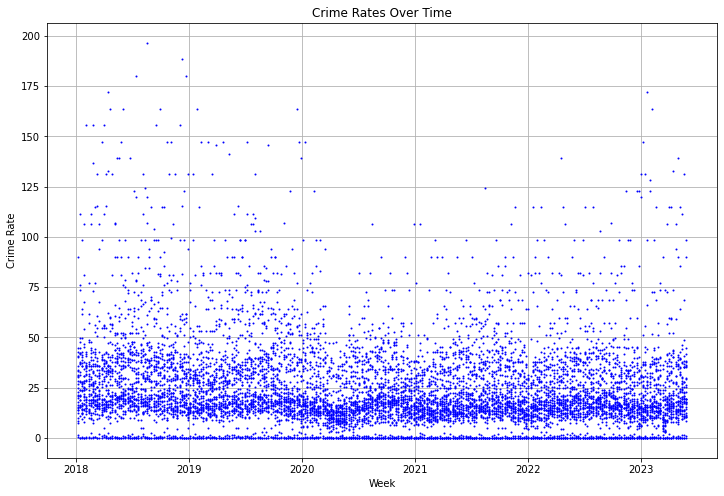

In [129]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df_plot.index, df_plot['crime_rate'], marker='o', linestyle='None', color='b', markersize=1)

plt.title('Crime Rates Over Time')
plt.xlabel('Week')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()